# Predicting Solar Energy Production

## Capstone Project  -- EDA

### Alberta Machine Learning Institute (Amii)

#### Project Objective:
Analyzing the performance of two solar power plants based on data gathered at the inverters level, in addition to the local weather data, in order to build a model that predicts the energy yield.

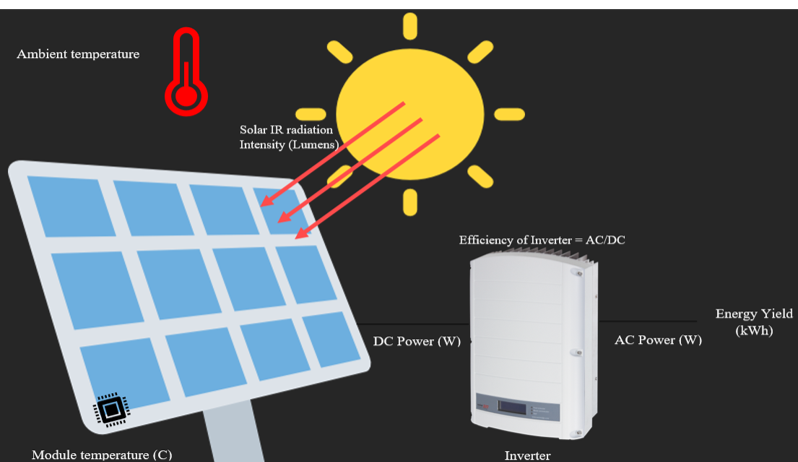

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Import Data

#### Plant Data:

In [2]:
plant_1 = pd.read_csv('Plant_1_Generation_Data.csv', parse_dates=['DATE_TIME'])
plant_1.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD  
0    6259559.0  
1    6183645.0  
2    6987759.0  
3    7602960.0  
4    7158964.0

In [3]:
plant_2 = pd.read_csv('Plant_2_Generation_Data.csv', parse_dates=['DATE_TIME'])
plant_2.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4136001  4UPUqMRk7TRMgml       0.0       0.0  9425.000000   
1 2020-05-15   4136001  81aHJ1q11NBPMrL       0.0       0.0     0.000000   
2 2020-05-15   4136001  9kRcWv60rDACzjR       0.0       0.0  3075.333333   
3 2020-05-15   4136001  Et9kgGMDl729KT4       0.0       0.0   269.933333   
4 2020-05-15   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   

    TOTAL_YIELD  
0  2.429011e+06  
1  1.215279e+09  
2  2.247720e+09  
3  1.704250e+06  
4  1.994153e+07

#### Fixing the AC Power Data to match DC Power Data

In [4]:
plant_1['DC_POWER'] = plant_1['DC_POWER'] / 10

#### Weather Data:

In [5]:
weather_1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv', parse_dates=['DATE_TIME'])
weather_2 = pd.read_csv('Plant_2_Weather_Sensor_Data.csv', parse_dates=['DATE_TIME'])

#### Merging Data:

In [6]:
plants = pd.concat([plant_1, plant_2], axis= 0, ignore_index = 'True')
weather = pd.concat([weather_1, weather_2], axis= 0, ignore_index = 'True')

In [7]:
df = plants.merge(weather, on=['DATE_TIME', 'PLANT_ID'], how = 'inner')
df.head()

DATE_TIME  PLANT_ID     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD     SOURCE_KEY_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    6259559.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
1    6183645.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
2    6987759.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
3    7602960.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
4    7158964.0  HmiyD2TTLFNqkNe            25.184316           22.857507   

   IRRADIATION  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

## Exploratory Data Analysis

In [8]:
df.shape

(136472, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136472 entries, 0 to 136471
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE_TIME            136472 non-null  datetime64[ns]
 1   PLANT_ID             136472 non-null  int64         
 2   SOURCE_KEY_x         136472 non-null  object        
 3   DC_POWER             136472 non-null  float64       
 4   AC_POWER             136472 non-null  float64       
 5   DAILY_YIELD          136472 non-null  float64       
 6   TOTAL_YIELD          136472 non-null  float64       
 7   SOURCE_KEY_y         136472 non-null  object        
 8   AMBIENT_TEMPERATURE  136472 non-null  float64       
 9   MODULE_TEMPERATURE   136472 non-null  float64       
 10  IRRADIATION          136472 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 12.5+ MB


In [10]:
df.describe()

PLANT_ID       DC_POWER       AC_POWER    DAILY_YIELD  \
count  1.364720e+05  136472.000000  136472.000000  136472.000000   
mean   4.135497e+06     280.977985     274.790259    3295.366192   
std    4.999863e+02     389.077816     380.180214    3035.313217   
min    4.135001e+06       0.000000       0.000000       0.000000   
25%    4.135001e+06       0.000000       0.000000      28.285714   
50%    4.135001e+06       3.613810       3.493095    2834.642857   
75%    4.136001e+06     543.321429     532.568571    5992.000000   
max    4.136001e+06    1447.112500    1410.950000    9873.000000   

        TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE    IRRADIATION  
count  1.364720e+05        136472.000000       136472.000000  136472.000000  
mean   3.303916e+08            26.763066           31.920744       0.230767  
std    6.085769e+08             3.897340           11.803674       0.305652  
min    0.000000e+00            20.398505           18.140415       0.000000  
25%    6.520020e+06            23.637604           22.411698       0.000000  
50%    7.269333e+06            25.908122           26.413755       0.026213  
75%    2.826096e+08            29.266583           40.778583       0.442961  
max    2.247916e+09            39.181638           66.635953       1.221652

In [11]:
df.duplicated().any().sum()

0

In [12]:
df.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [13]:
df.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'SOURCE_KEY_y', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')

<AxesSubplot:>

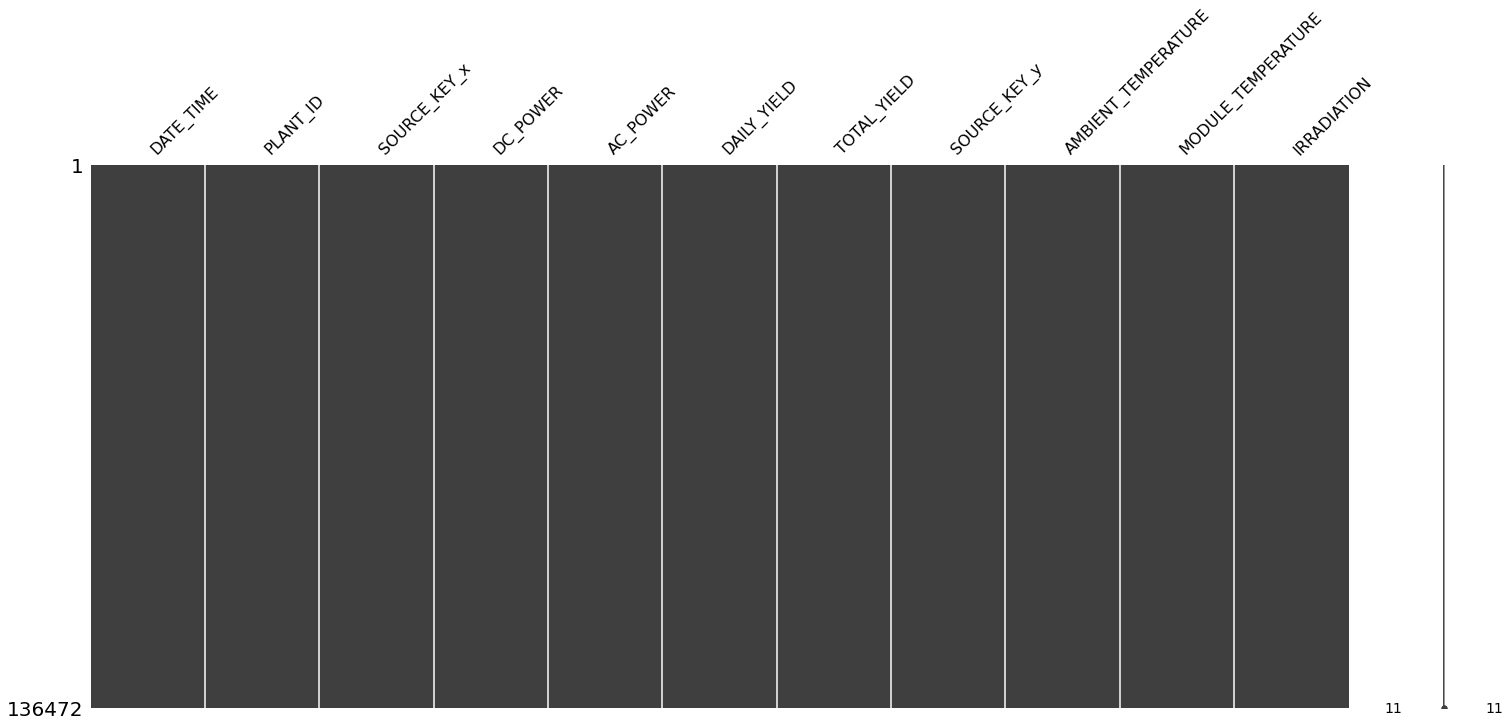

In [14]:
import missingno as msno
msno.matrix(df)

### Feature Engineering

#### Creating New Features

In [15]:
df['PLANT_EFFICIENCY'] = df['AC_POWER'] / df['DC_POWER']
df['PLANT_EFFICIENCY'].describe()

count    68859.000000
mean         0.977011
std          0.004795
min          0.912790
25%          0.975489
50%          0.978443
75%          0.980197
max          1.065922
Name: PLANT_EFFICIENCY, dtype: float64

In [16]:
df['PLANT_EFFICIENCY'].replace(np.nan, 0, inplace = True)

In [17]:
df.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
PLANT_EFFICIENCY       0
dtype: int64

In [18]:
df.sort_values(by=['DATE_TIME'], inplace= True, ignore_index=True)

In [19]:
df.head()

DATE_TIME  PLANT_ID     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0     0.000000   
1 2020-05-15   4136001  Et9kgGMDl729KT4       0.0       0.0   269.933333   
2 2020-05-15   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   
3 2020-05-15   4136001  LYwnQax7tkwH5Cb       0.0       0.0  1872.500000   
4 2020-05-15   4136001  LlT2YUhhzqhg5Sw       0.0       0.0  1094.357143   

    TOTAL_YIELD     SOURCE_KEY_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0  6.259559e+06  HmiyD2TTLFNqkNe            25.184316           22.857507   
1  1.704250e+06  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
2  1.994153e+07  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
3  1.794959e+09  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
4  2.825928e+08  iq8k7ZNt4Mwm3w0            27.004764           25.060789   

   IRRADIATION  PLANT_EFFICIENCY  
0          0.0               0.0  
1          0.0               0.0  
2          0.0               0.0  
3          0.0               0.0  
4          0.0               0.0

In [20]:
df.tail()

DATE_TIME  PLANT_ID     SOURCE_KEY_x  DC_POWER  AC_POWER  \
136467 2020-06-17 23:45:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
136468 2020-06-17 23:45:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
136469 2020-06-17 23:45:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
136470 2020-06-17 23:45:00   4135001  ZoEaEvLYb1n2sOq       0.0       0.0   
136471 2020-06-17 23:45:00   4136001  xoJJ8DcxJEcupym       0.0       0.0   

        DAILY_YIELD  TOTAL_YIELD     SOURCE_KEY_y  AMBIENT_TEMPERATURE  \
136467       6052.0    7237425.0  HmiyD2TTLFNqkNe            21.909288   
136468       6034.0    6433566.0  HmiyD2TTLFNqkNe            21.909288   
136469       5521.0    6485319.0  HmiyD2TTLFNqkNe            21.909288   
136470       5871.0    7341753.0  HmiyD2TTLFNqkNe            21.909288   
136471       4316.0  209335741.0  iq8k7ZNt4Mwm3w0            23.202871   

        MODULE_TEMPERATURE  IRRADIATION  PLANT_EFFICIENCY  
136467           20.427972          0.0               0.0  
136468           20.427972          0.0               0.0  
136469           20.427972          0.0               0.0  
136470           20.427972          0.0               0.0  
136471           22.535908          0.0               0.0

In [21]:
df.shape

(136472, 12)

In [22]:
ENERGY_PRODUCTION = []

for i in range(1, len(df.DAILY_YIELD)):
    element =  abs(df.DAILY_YIELD[i] - df.DAILY_YIELD[i-1])
    ENERGY_PRODUCTION.append(element)
    
len(ENERGY_PRODUCTION)
ENERGY_PRODUCTION.append(0)
len(ENERGY_PRODUCTION)
ENERGY_PRODUCTION[0] = 0
df['YIELD'] = ENERGY_PRODUCTION

for i in range(1, len(df.YIELD)):
    if df.YIELD[i] == df.YIELD[i-1]:
        df.YIELD[i-1] = 0
        
df.head()

DATE_TIME  PLANT_ID     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0     0.000000   
1 2020-05-15   4136001  Et9kgGMDl729KT4       0.0       0.0   269.933333   
2 2020-05-15   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   
3 2020-05-15   4136001  LYwnQax7tkwH5Cb       0.0       0.0  1872.500000   
4 2020-05-15   4136001  LlT2YUhhzqhg5Sw       0.0       0.0  1094.357143   

    TOTAL_YIELD     SOURCE_KEY_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0  6.259559e+06  HmiyD2TTLFNqkNe            25.184316           22.857507   
1  1.704250e+06  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
2  1.994153e+07  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
3  1.794959e+09  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
4  2.825928e+08  iq8k7ZNt4Mwm3w0            27.004764           25.060789   

   IRRADIATION  PLANT_EFFICIENCY        YIELD  
0          0.0               0.0     0.000000  
1          0.0               0.0  2907.066667  
2          0.0               0.0  1304.500000  
3          0.0               0.0   778.142857  
4          0.0               0.0  4597.842857

In [23]:
df[df['YIELD'] < 0]['YIELD'] = 0

In [24]:
df.PLANT_ID.unique()

array([4135001, 4136001], dtype=int64)

In [25]:
df[df.PLANT_ID == 0.0]['PLANT_ID'].count()

0

In [26]:
df['PLANT_ID'].replace(4135001, 'Plant1', inplace = True)
df['PLANT_ID'].replace(4136001, 'Plant2', inplace = True)

In [27]:
df['PLANT_ID'].astype('category')

0         Plant1
1         Plant2
2         Plant2
3         Plant2
4         Plant2
           ...  
136467    Plant1
136468    Plant1
136469    Plant1
136470    Plant1
136471    Plant2
Name: PLANT_ID, Length: 136472, dtype: category
Categories (2, object): ['Plant1', 'Plant2']

### Exploratory Data Analysis

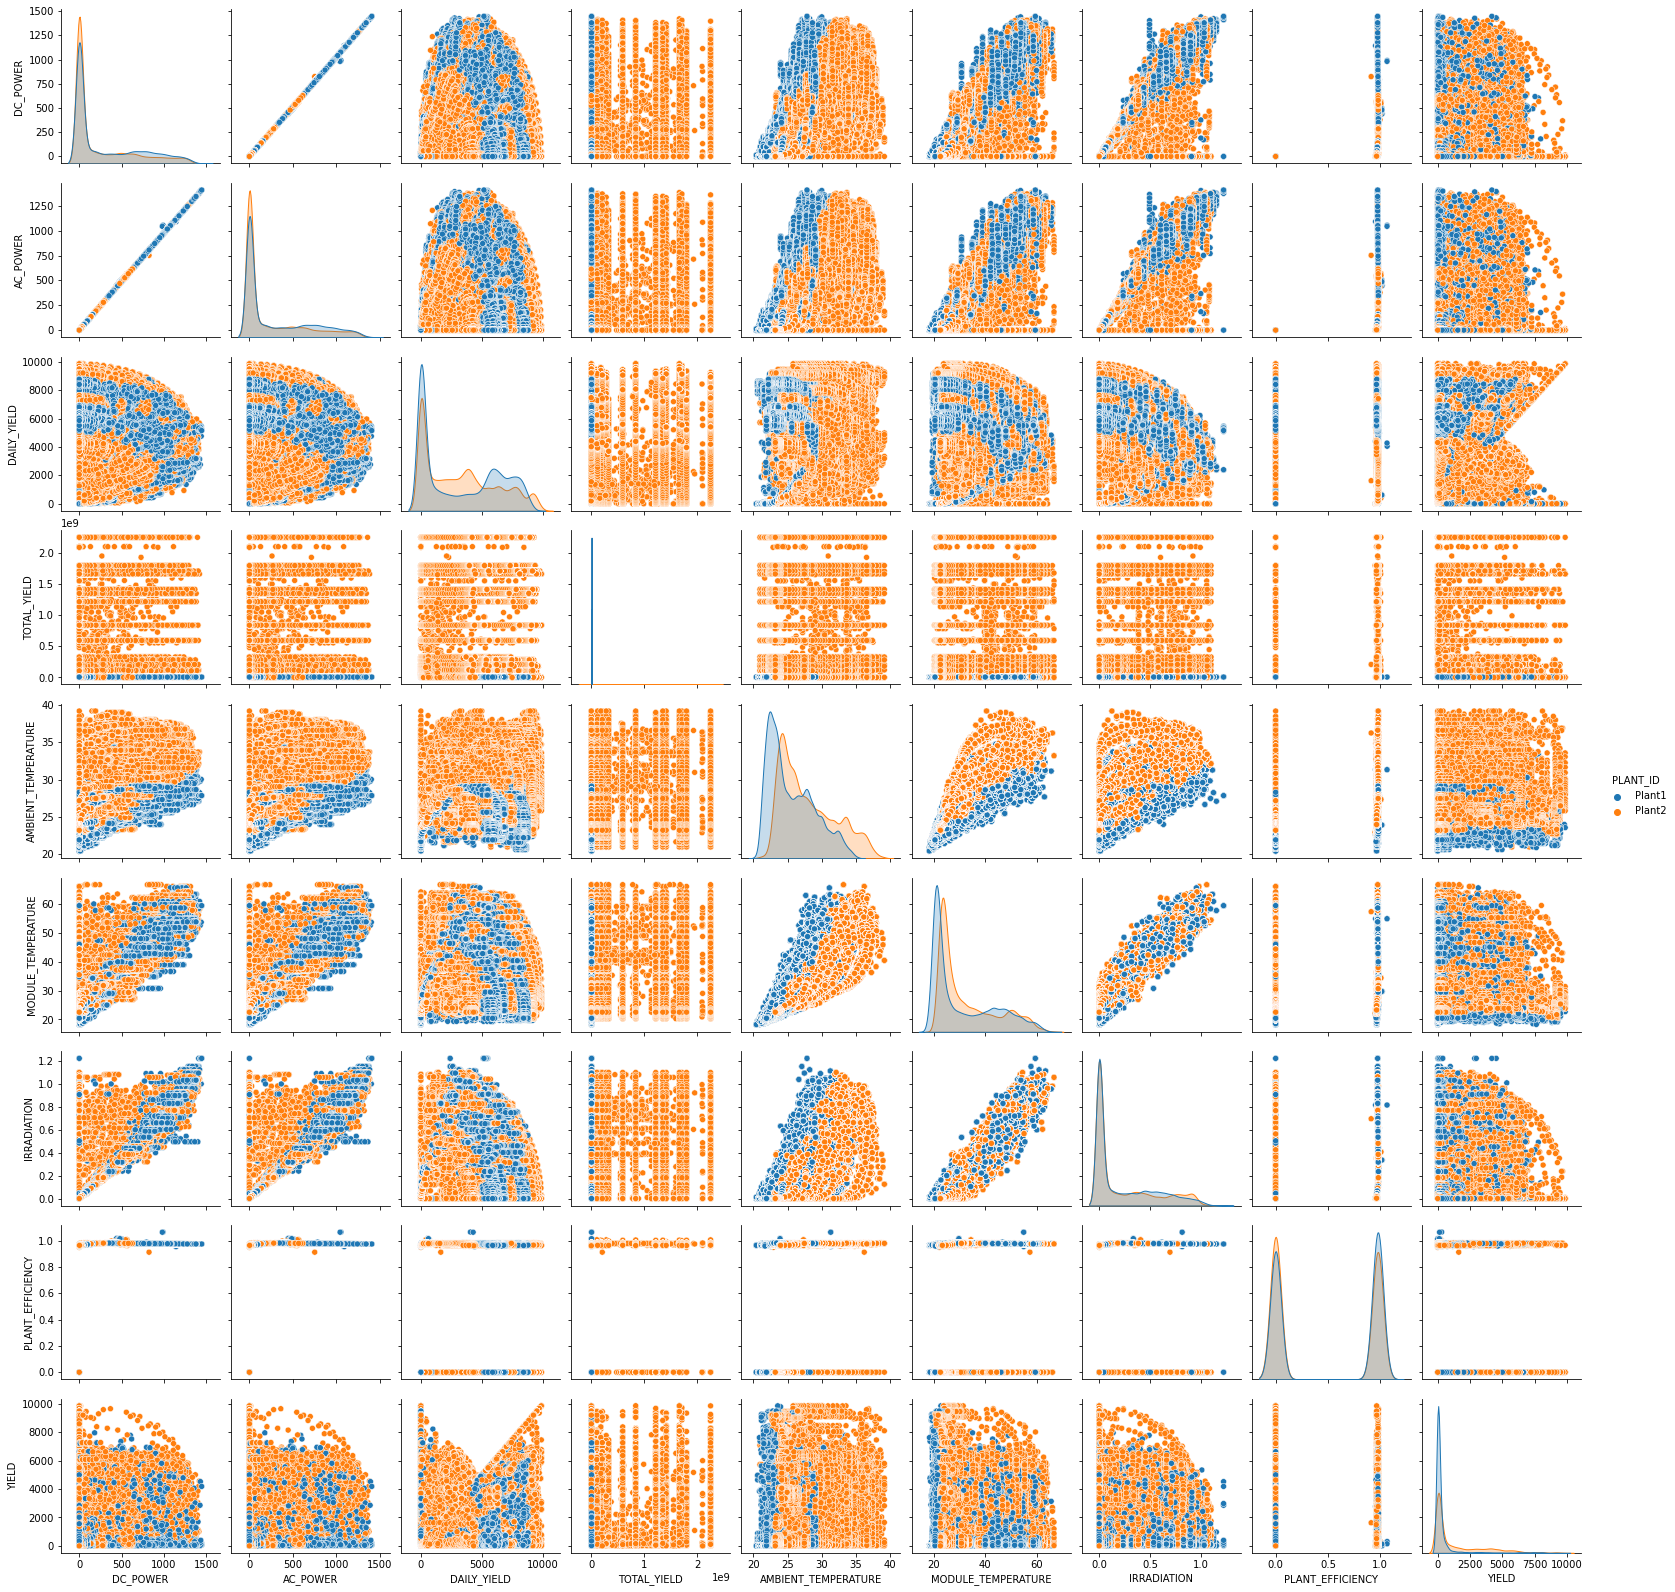

In [37]:
sns.pairplot(df, hue = 'PLANT_ID')
plt.savefig('Pairplot.png')

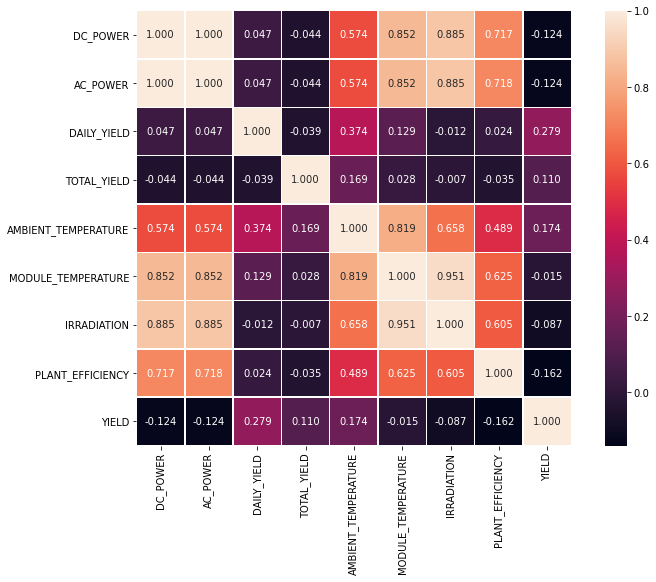

In [28]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(df.corr(method='pearson'), robust=True, annot=True, fmt='0.3f', linewidths=.5, square=True)

### Investigating the Modular Temperature

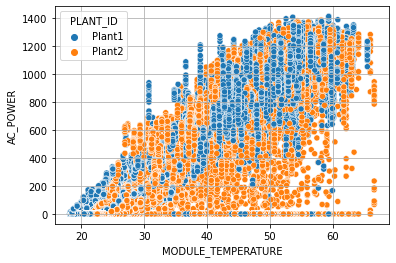

In [30]:
g = sns.scatterplot(x = 'MODULE_TEMPERATURE', y = 'AC_POWER', data = df, hue = 'PLANT_ID')
plt.grid()
plt.show()

In [31]:
df['PLANT_ID'].unique()

array(['Plant1', 'Plant2'], dtype=object)

Text(0.5, 0, 'AC_POWER')

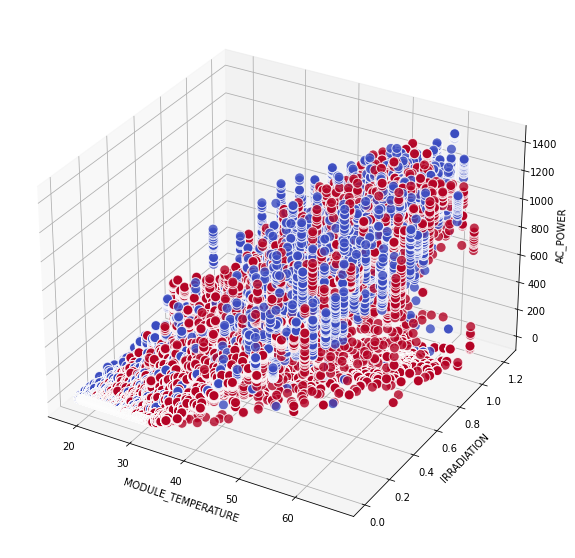

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')

xs = df['MODULE_TEMPERATURE']
ys = df['IRRADIATION']
zs = df['AC_POWER']

ax.scatter(xs, ys, zs,  c = df['PLANT_ID'] ,cmap = 'coolwarm', s=100, alpha=0.8, edgecolors='w')

ax.set_xlabel('MODULE_TEMPERATURE')
ax.set_ylabel('IRRADIATION')
ax.set_zlabel('AC_POWER')

In [31]:
df['TIME'] = df['DATE_TIME'].dt.time
df['DATE'] = df['DATE_TIME'].dt.date
df.head()

DATE_TIME PLANT_ID     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   Plant1  1BY6WEcLGh8j5v7       0.0       0.0     0.000000   
1 2020-05-15   Plant2  Et9kgGMDl729KT4       0.0       0.0   269.933333   
2 2020-05-15   Plant2  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   
3 2020-05-15   Plant2  LYwnQax7tkwH5Cb       0.0       0.0  1872.500000   
4 2020-05-15   Plant2  LlT2YUhhzqhg5Sw       0.0       0.0  1094.357143   

    TOTAL_YIELD     SOURCE_KEY_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0  6.259559e+06  HmiyD2TTLFNqkNe            25.184316           22.857507   
1  1.704250e+06  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
2  1.994153e+07  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
3  1.794959e+09  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
4  2.825928e+08  iq8k7ZNt4Mwm3w0            27.004764           25.060789   

   IRRADIATION  PLANT_EFFICIENCY        YIELD      TIME        DATE  
0          0.0               0.0     0.000000  00:00:00  2020-05-15  
1          0.0               0.0  2907.066667  00:00:00  2020-05-15  
2          0.0               0.0  1304.500000  00:00:00  2020-05-15  
3          0.0               0.0   778.142857  00:00:00  2020-05-15  
4          0.0               0.0  4597.842857  00:00:00  2020-05-15

In [33]:
#define function to multi plot
def multi_plot(data= None, row = None, col = None, title='AC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,20)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.8)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, style = 'k.')
        ax.set_title('{} {}'.format(title, cols[i-1]))

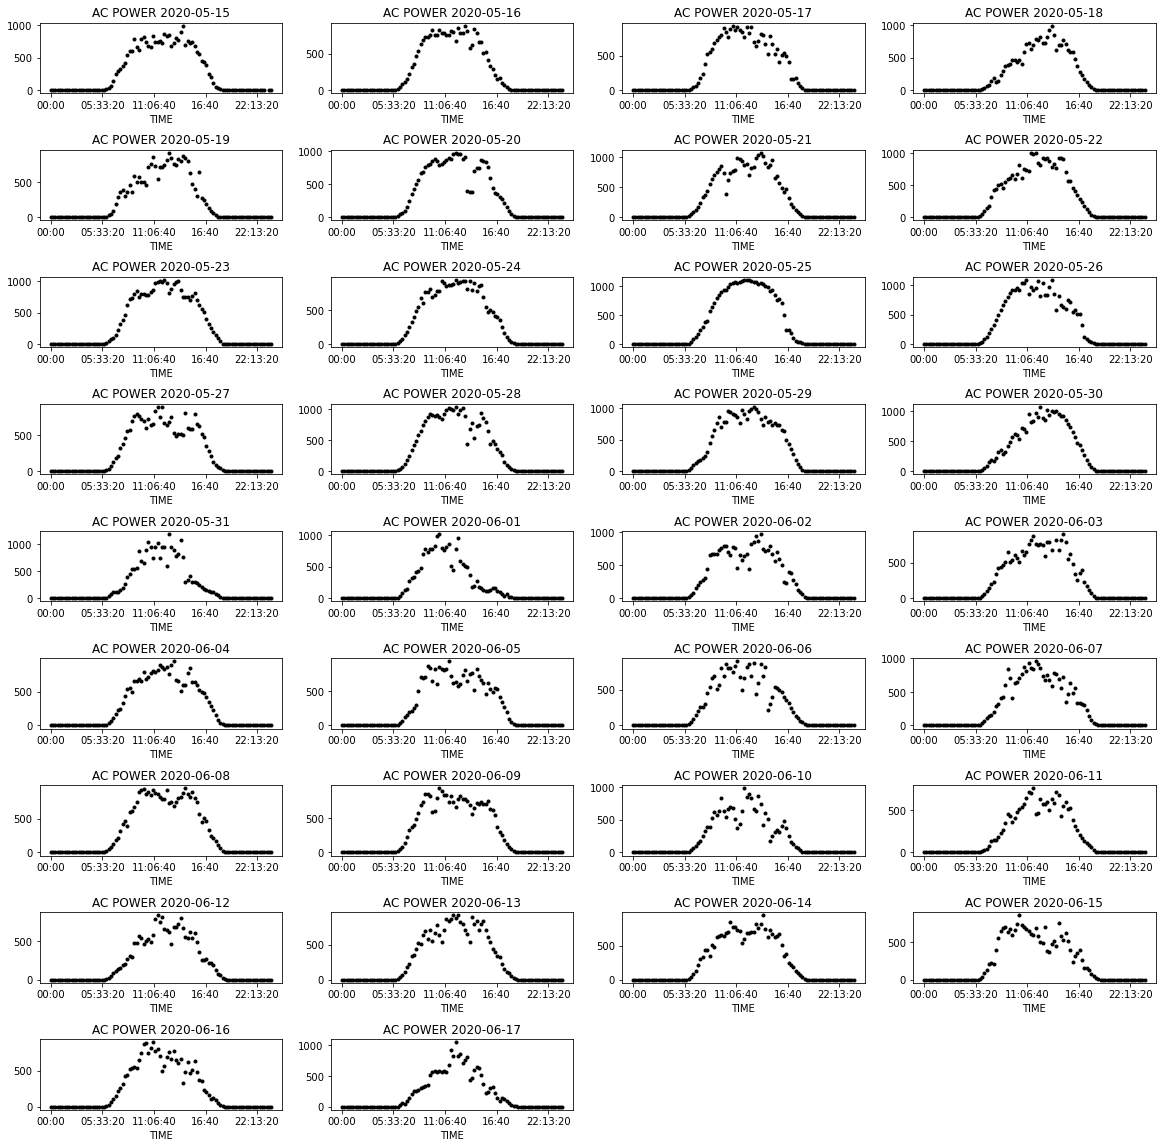

In [34]:
AC_power = df.pivot_table(values='AC_POWER', index='TIME', columns='DATE')
multi_plot(data=AC_power , row=9, col=4, title='AC POWER')

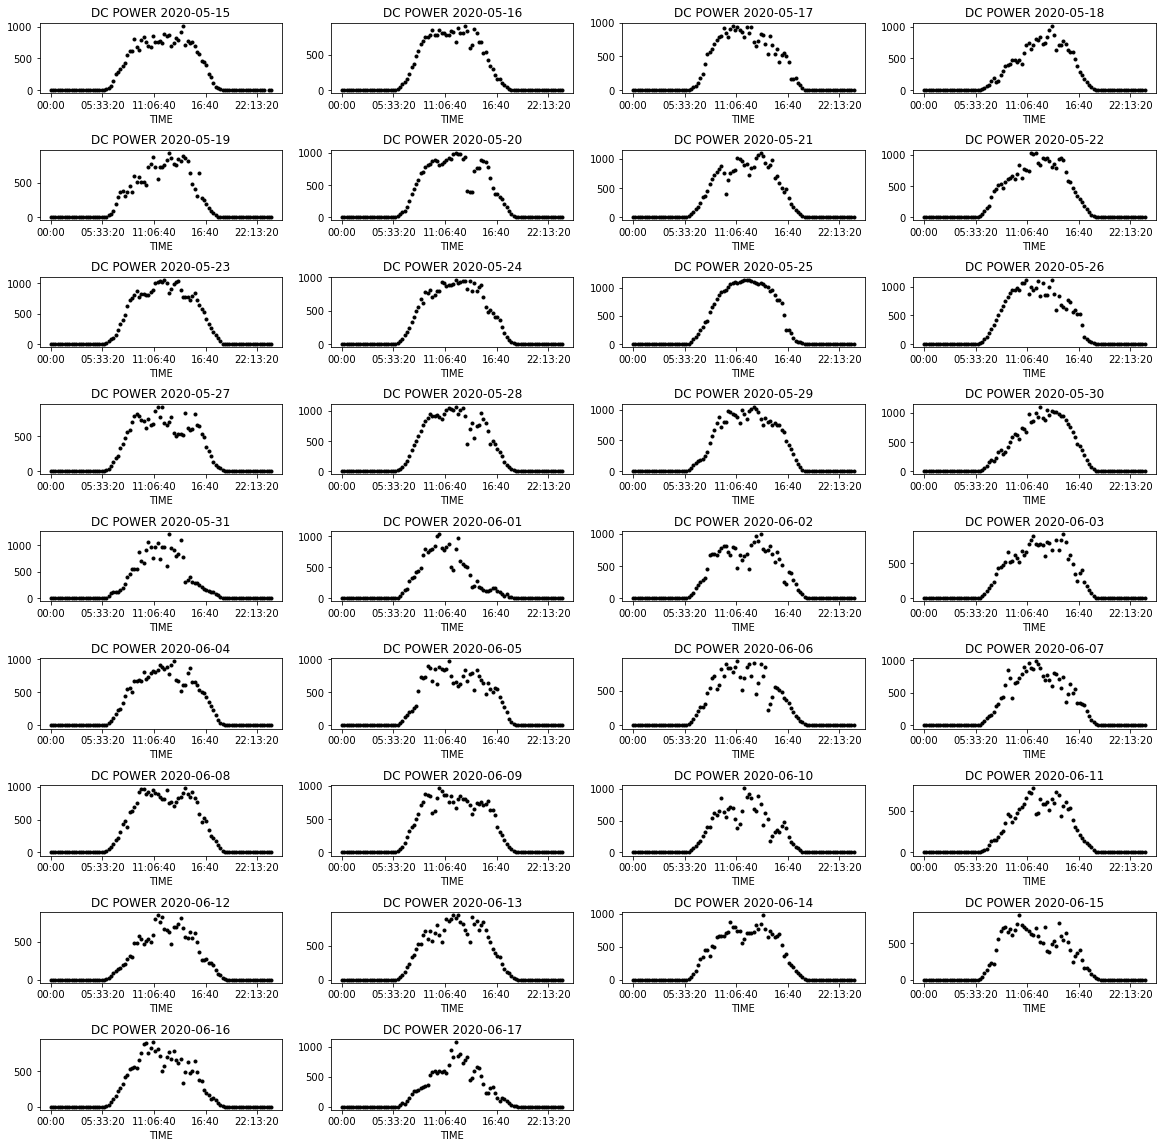

In [35]:
DC_power = df.pivot_table(values='DC_POWER', index='TIME', columns='DATE')
multi_plot(data=DC_power , row=9, col=4, title='DC POWER')

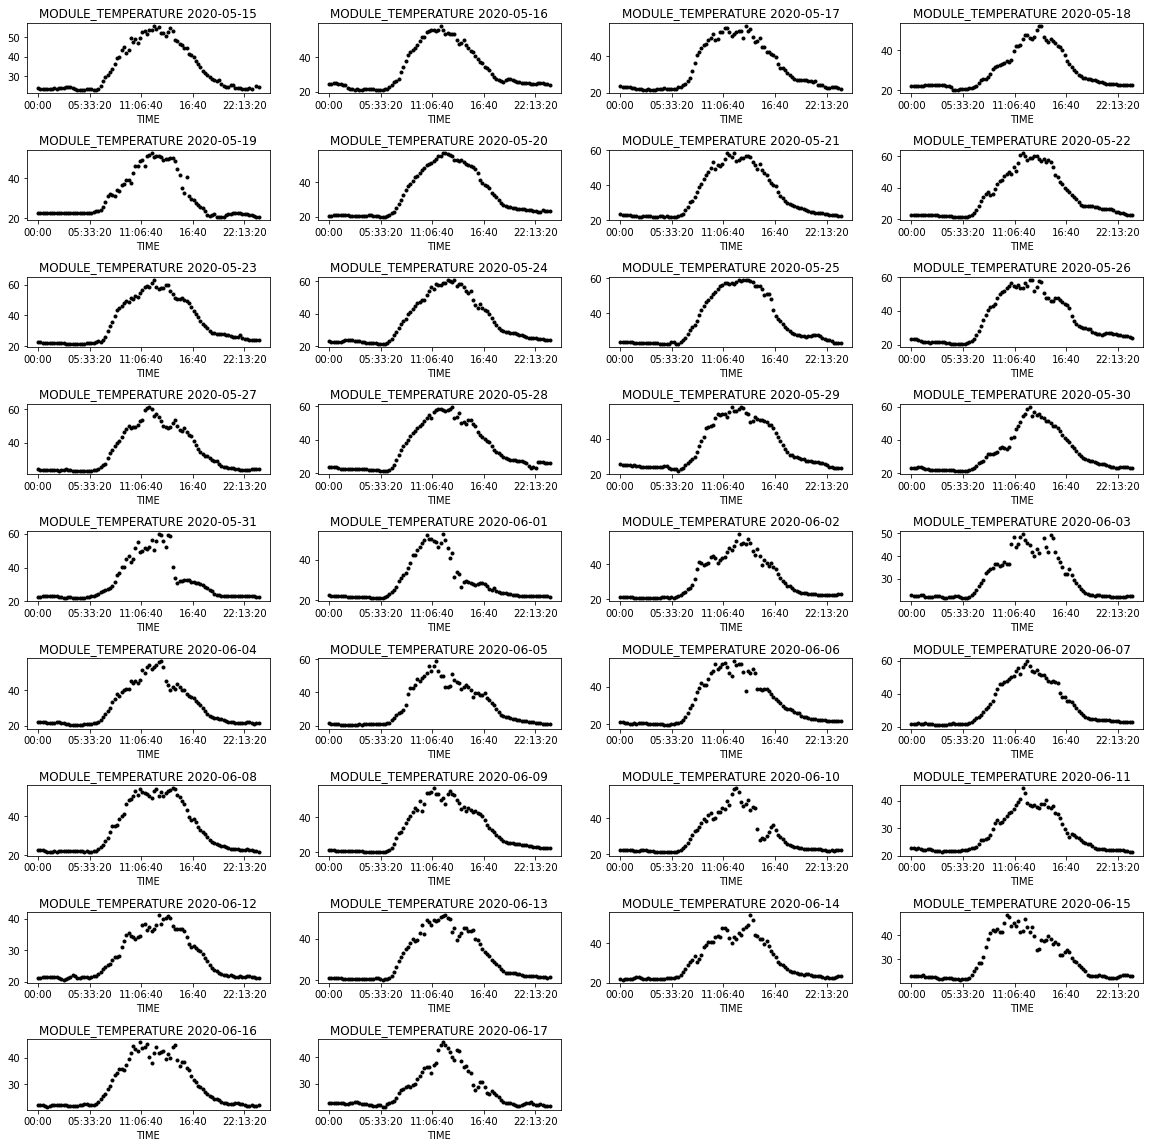

In [36]:
MT_power = df.pivot_table(values='MODULE_TEMPERATURE', index='TIME', columns='DATE')
multi_plot(data=MT_power , row=9, col=4, title='MODULE_TEMPERATURE')

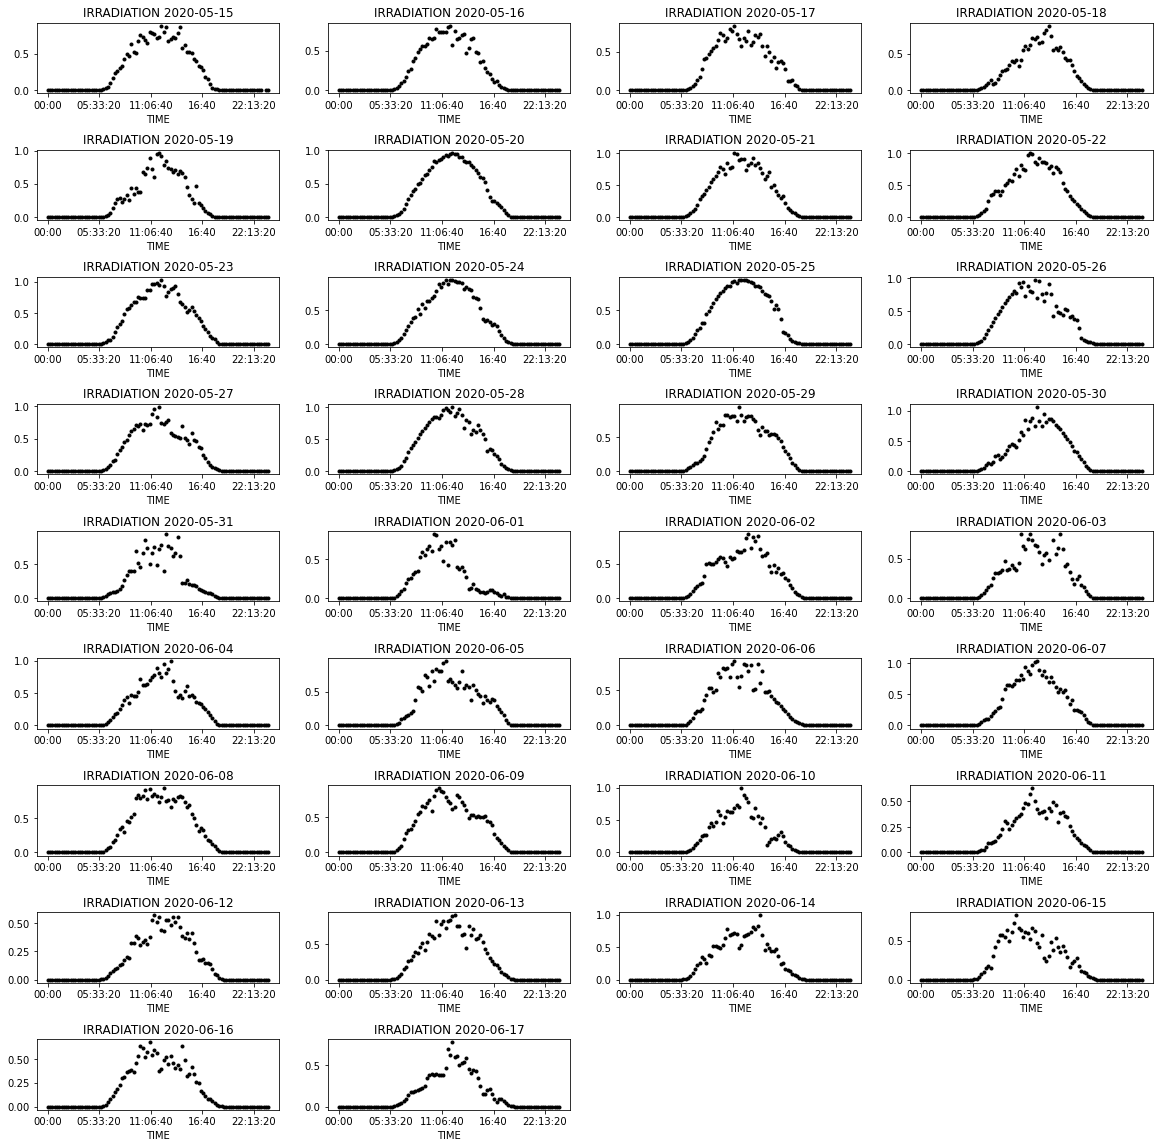

In [37]:
IRR_power = df.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')
multi_plot(data=IRR_power , row=9, col=4, title='IRRADIATION')

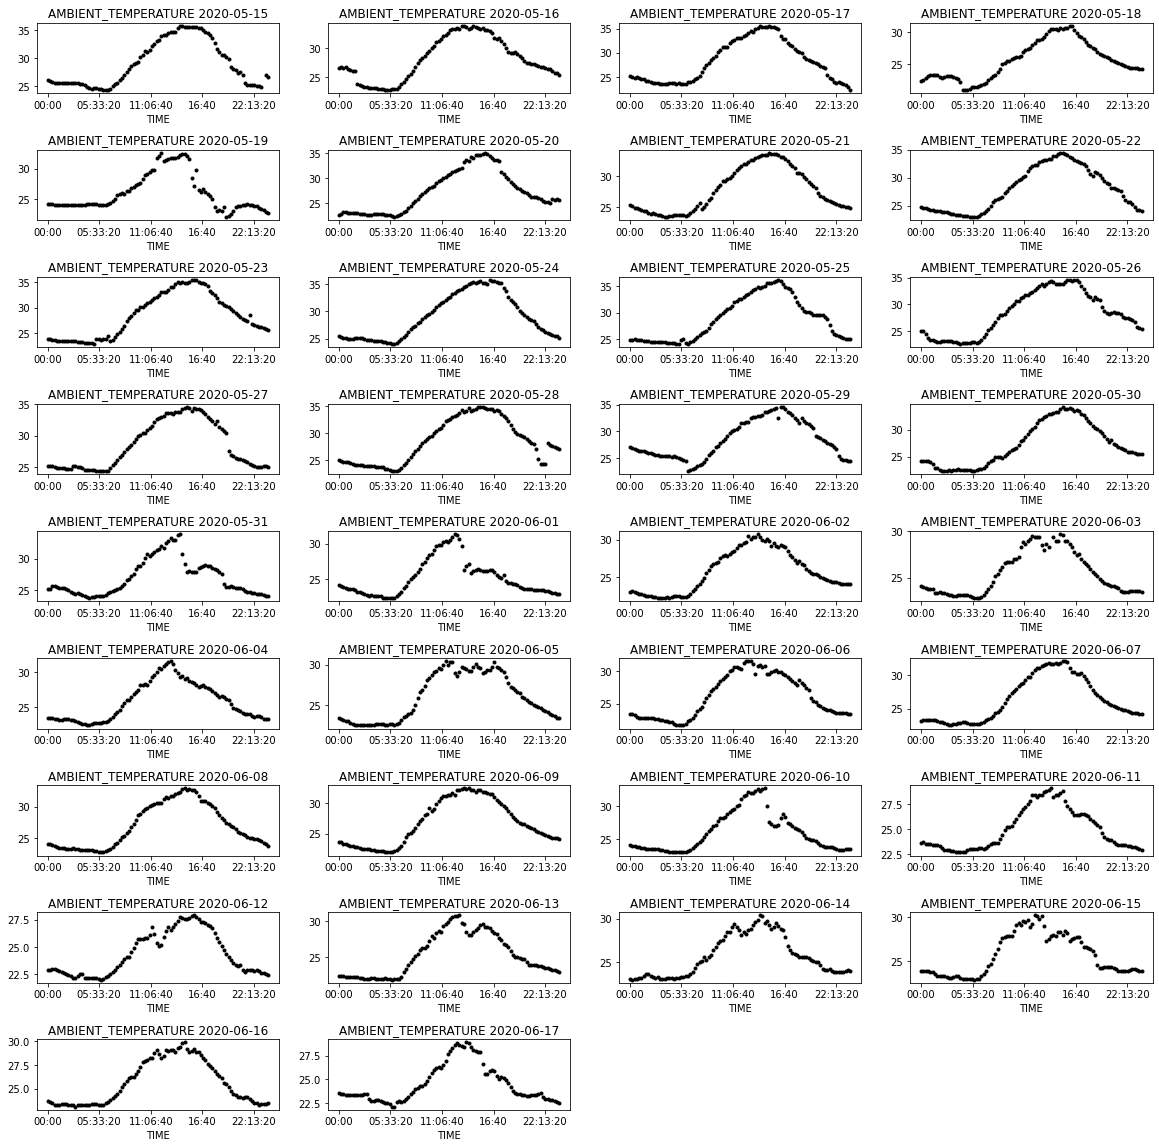

In [38]:
AT_power = df.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')
multi_plot(data=AT_power , row=9, col=4, title='AMBIENT_TEMPERATURE')

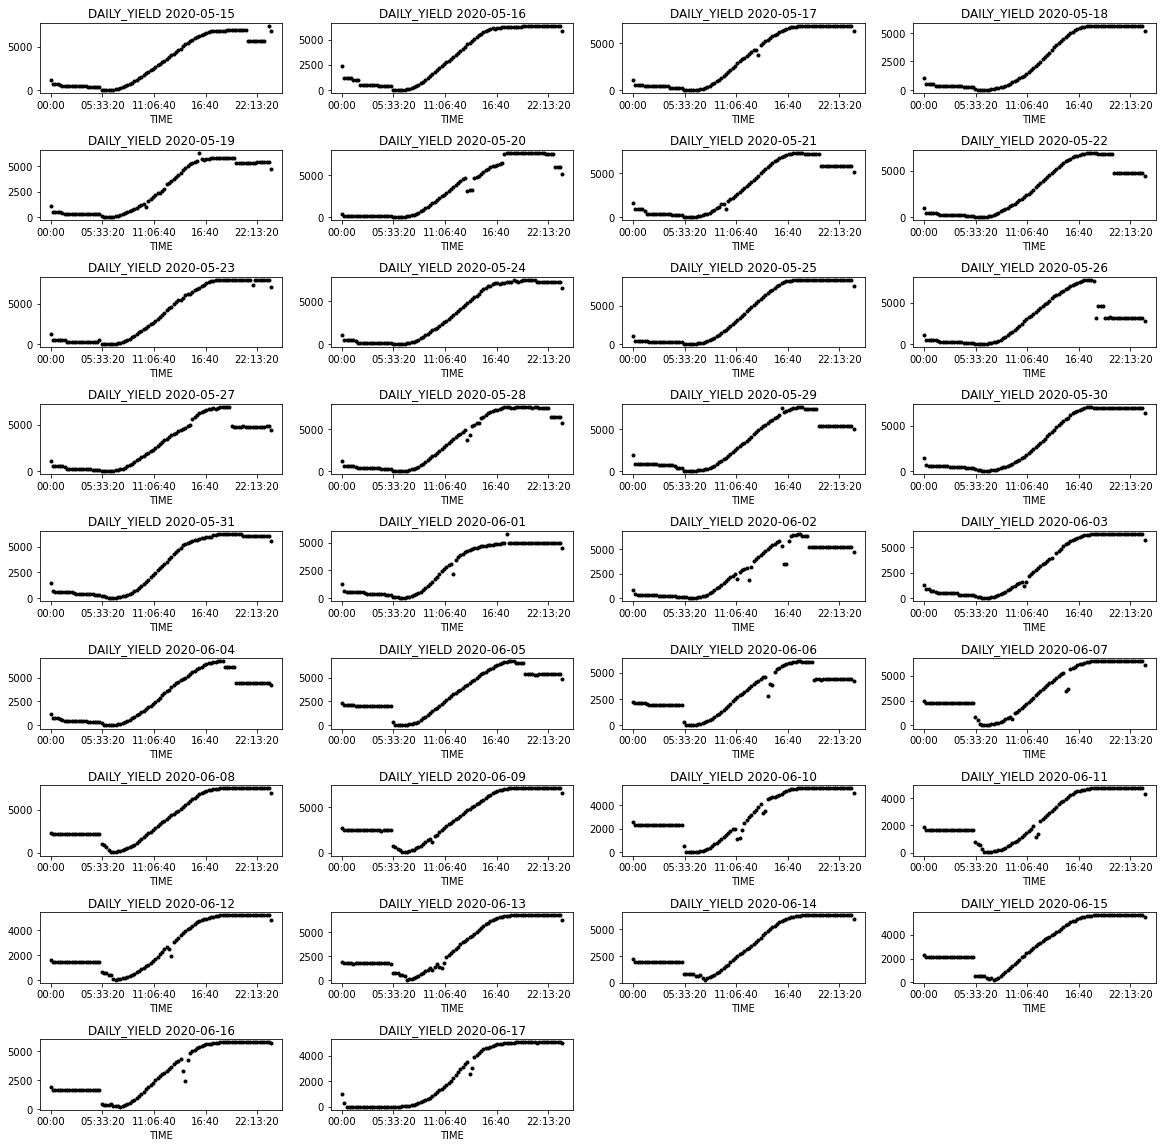

In [39]:
DAILY_YIELD = df.pivot_table(values='DAILY_YIELD', index='TIME', columns='DATE')
multi_plot(data=DAILY_YIELD , row=9, col=4, title='DAILY_YIELD')
plt.savefig('Dail Yield')
plt.show()

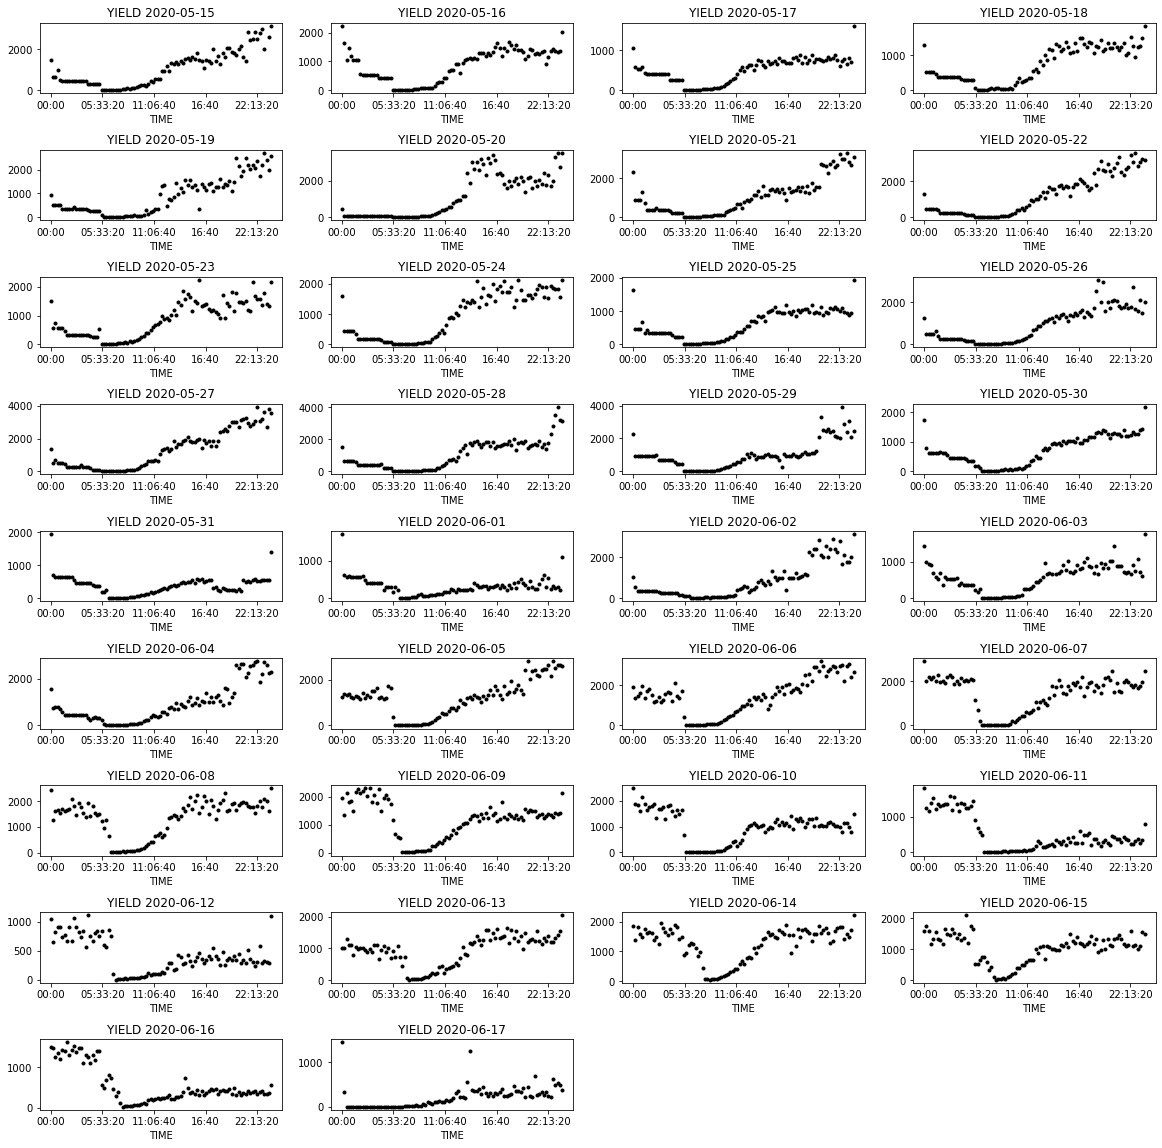

In [40]:
YIELD = df.pivot_table(values='YIELD', index='TIME', columns='DATE')
multi_plot(data=YIELD , row=9, col=4, title='YIELD')
plt.savefig('Yield')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

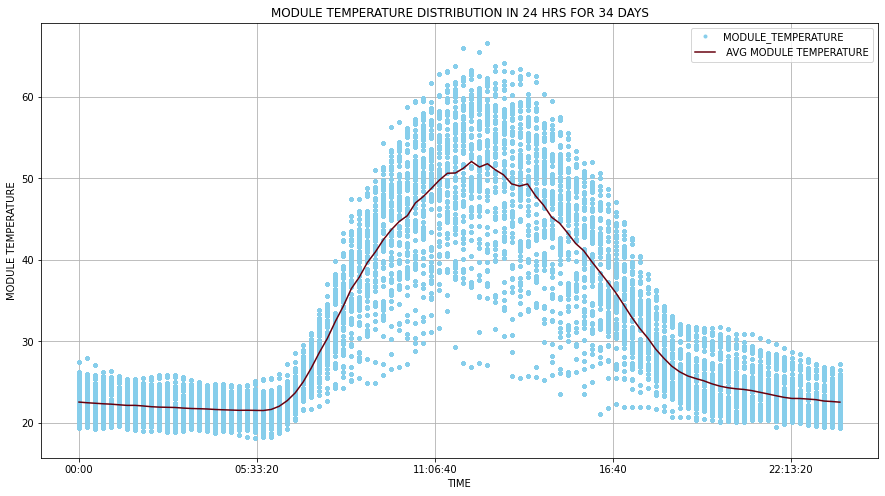

In [41]:
df.plot(x= 'TIME', y='MODULE_TEMPERATURE', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('TIME')['MODULE_TEMPERATURE'].mean().plot(cmap = 'Reds_r', legend = True, label = ' AVG MODULE TEMPERATURE')
plt.ylabel('MODULE TEMPERATURE')
plt.title('MODULE TEMPERATURE DISTRIBUTION IN 24 HRS FOR 34 DAYS')
plt.grid()
plt.savefig('modeule temp')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

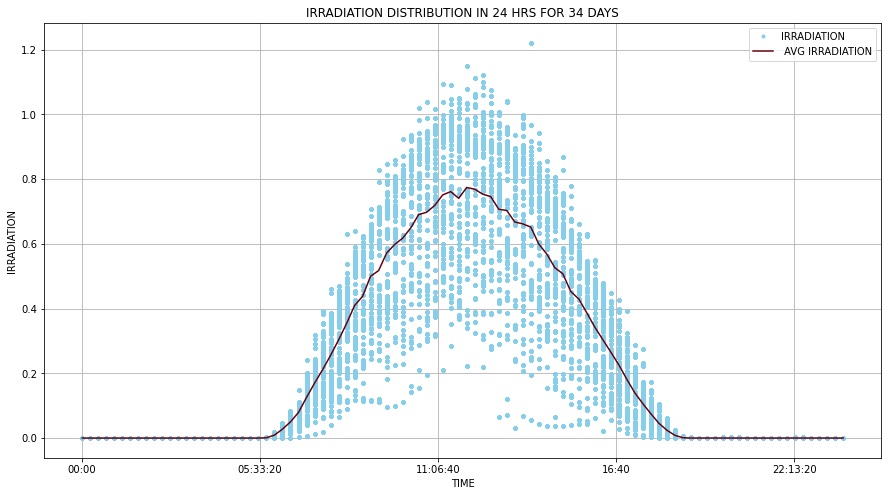

In [42]:
df.plot(x= 'TIME', y='IRRADIATION', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('TIME')['IRRADIATION'].mean().plot(cmap = 'Reds_r', legend = True, label = ' AVG IRRADIATION')
plt.ylabel('IRRADIATION')
plt.title('IRRADIATION DISTRIBUTION IN 24 HRS FOR 34 DAYS')
plt.grid()
plt.savefig('IRRADIATION')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

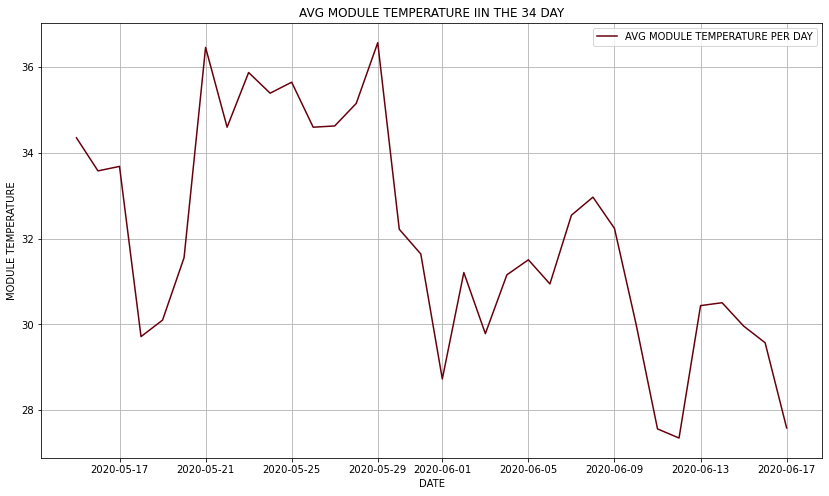

In [43]:
df.groupby('DATE')['MODULE_TEMPERATURE'].mean().plot(cmap = 'Reds_r', figsize = (14,8),legend= True, label = 'AVG MODULE TEMPERATURE PER DAY')
plt.ylabel('MODULE TEMPERATURE')
plt.xlabel('DATE')
plt.title('AVG MODULE TEMPERATURE IIN THE 34 DAY')
plt.grid()
plt.savefig('MODULE_TEMPERATURE')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

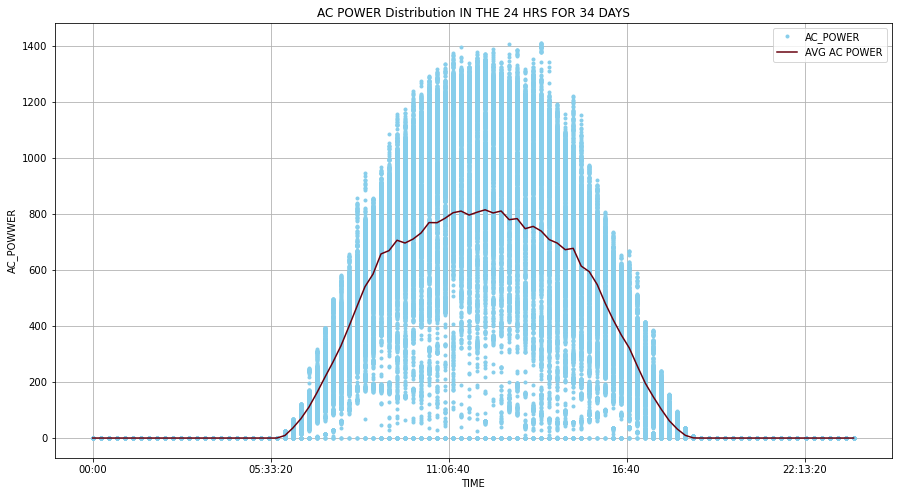

In [44]:
df.plot(x= 'TIME', y='AC_POWER', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('TIME')['AC_POWER'].mean().plot(cmap = 'Reds_r', legend = True, label = 'AVG AC POWER')
plt.ylabel('AC_POWWER')
plt.title('AC POWER Distribution IN THE 24 HRS FOR 34 DAYS')
plt.grid()
plt.savefig('AC Power')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

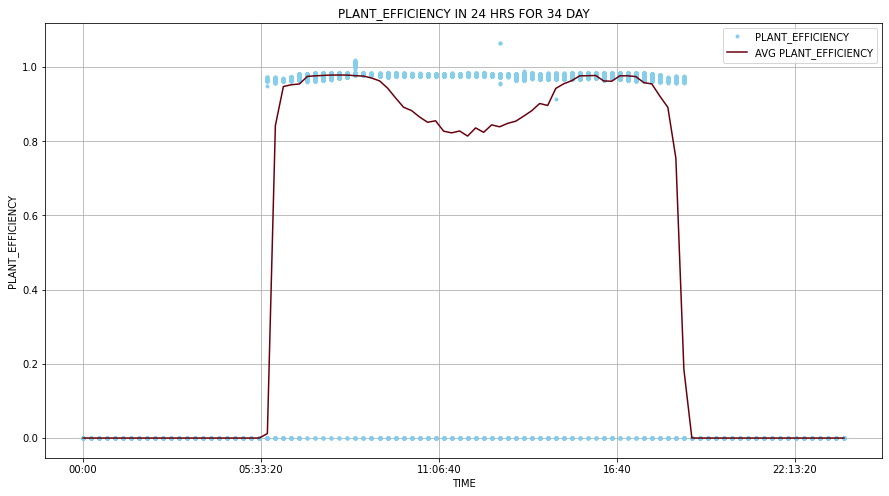

In [45]:
df.plot(x= 'TIME', y='PLANT_EFFICIENCY', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('TIME')['PLANT_EFFICIENCY'].mean().plot(cmap = 'Reds_r', legend = True, label = 'AVG PLANT_EFFICIENCY')
plt.ylabel('PLANT_EFFICIENCY')
plt.title('PLANT_EFFICIENCY IN 24 HRS FOR 34 DAY')
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

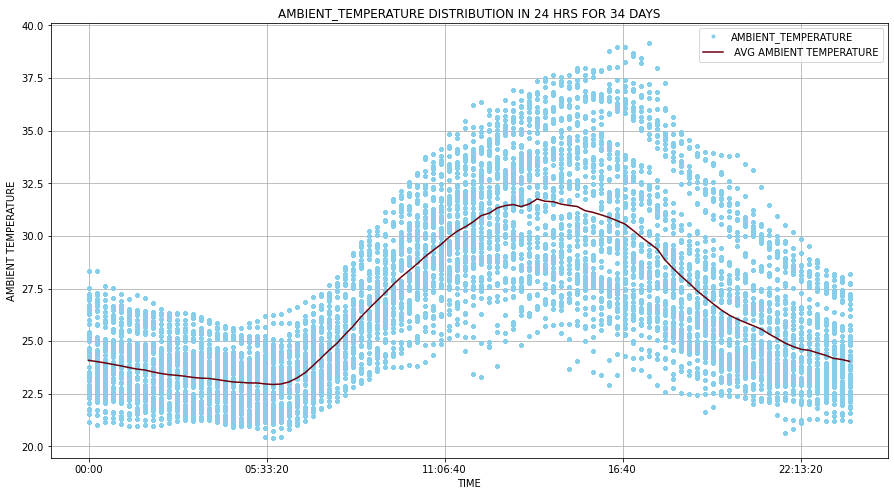

In [46]:
df.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('TIME')['AMBIENT_TEMPERATURE'].mean().plot(cmap = 'Reds_r', legend = True, label = ' AVG AMBIENT TEMPERATURE')
plt.ylabel('AMBIENT TEMPERATURE')
plt.title('AMBIENT_TEMPERATURE DISTRIBUTION IN 24 HRS FOR 34 DAYS')
plt.grid()
plt.savefig('Ambient Temperature')
plt.show

### Thank you!